Using cache dir: C:\Users\guilh\Área de Trabalho\rockpool\HSDS\data
C:\Users\guilh\Área de Trabalho\rockpool\HSDS\data\hdspikes\shd_train.h5
C:\Users\guilh\Área de Trabalho\rockpool\HSDS\data\hdspikes\shd_test.h5
C:\Users\guilh\Área de Trabalho\rockpool\HSDS\data\hdspikes\ssc_train.h5
C:\Users\guilh\Área de Trabalho\rockpool\HSDS\data\hdspikes\ssc_valid.h5
C:\Users\guilh\Área de Trabalho\rockpool\HSDS\data\hdspikes\ssc_test.h5
Times (ms): [0.       0.003626 0.004875 ... 0.9844   0.9883   0.9937  ]
Unit IDs: [606 695 606 ... 293  27 693]
Label: 0


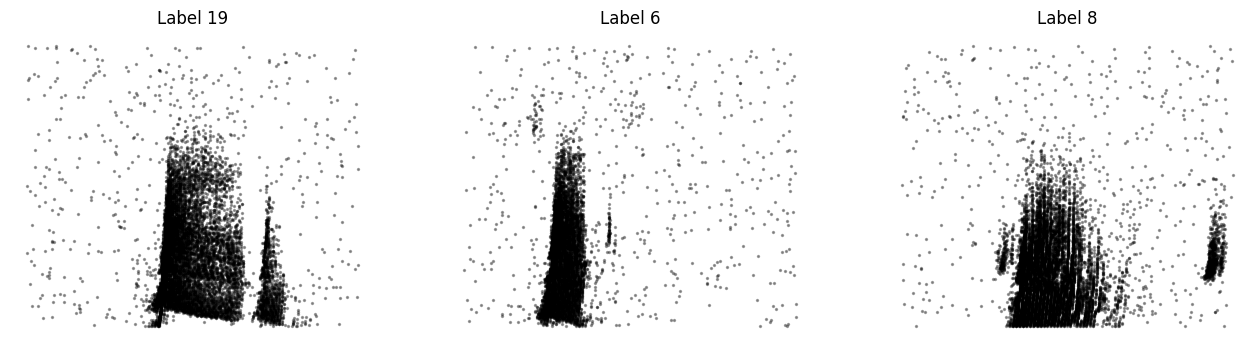

In [3]:
import os
import urllib.request
import gzip, shutil
from tensorflow.keras.utils import get_file
# Set the cache directory to the desired path
cache_dir = r"C:\Users\guilh\Área de Trabalho\rockpool\HSDS\data"
cache_subdir = "hdspikes"
print("Using cache dir: %s" % cache_dir)
# The remote directory with the data files
base_url = "https://zenkelab.org/datasets"
# Retrieve MD5 hashes from remote
response = urllib.request.urlopen("%s/md5sums.txt"%base_url)
data = response.read() 
lines = data.decode('utf-8').split("\n")
file_hashes = { line.split()[1]:line.split()[0] for line in lines if len(line.split())==2 }
def get_and_gunzip(origin, filename, md5hash=None):
    gz_file_path = get_file(filename, origin, md5_hash=md5hash, cache_dir=cache_dir, cache_subdir=cache_subdir)
    hdf5_file_path=gz_file_path[:-3]
    if not os.path.isfile(hdf5_file_path) or os.path.getctime(gz_file_path) > os.path.getctime(hdf5_file_path):
        print("Decompressing %s"%gz_file_path)
        with gzip.open(gz_file_path, 'r') as f_in, open(hdf5_file_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
    return hdf5_file_path
# Download the Spiking Heidelberg Digits (SHD) dataset
files = [ "shd_train.h5.gz", 
          "shd_test.h5.gz",
        ]
for fn in files:
    origin = "%s/%s"%(base_url,fn)
    hdf5_file_path = get_and_gunzip(origin, fn, md5hash=file_hashes[fn])
    print(hdf5_file_path)
# Similarly, to download the SSC dataset
files = [ "ssc_train.h5.gz", 
          "ssc_valid.h5.gz",
          "ssc_test.h5.gz",
        ]
for fn in files:
    origin = "%s/%s"%(base_url,fn)
    hdf5_file_path = get_and_gunzip(origin,fn,md5hash=file_hashes[fn])
    print(hdf5_file_path)
# At this point we can visualize some of the data
import tables
import numpy as np
fileh = tables.open_file(hdf5_file_path, mode='r')
units = fileh.root.spikes.units
times = fileh.root.spikes.times
labels = fileh.root.labels
# This is how we access spikes and labels
index = 0
print("Times (ms):", times[index])
print("Unit IDs:", units[index])
print("Label:", labels[index])
# A quick raster plot for one of the samples
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,4))
idx = np.random.randint(len(times),size=3)
for i,k in enumerate(idx):
    ax = plt.subplot(1,3,i+1)
    ax.scatter(times[k],700-units[k], color="k", alpha=0.33, s=2)
    ax.set_title("Label %i"%labels[k])
    ax.axis("off")
plt.show()